# Linear Regression models 

We upload our cleaned datas and perform a linear regression model. 

In [68]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df_lr = pd.read_csv('weather_data_lin_reg.csv')
df_lr['dt_iso'] = pd.to_datetime(df_lr['dt_iso'], format='%Y-%m-%d %H:%M:%S.%f')
df_lr = df_lr.set_index('dt_iso')
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15185 entries, 1979-01-04 to 2020-07-31
Data columns (total 10 columns):
wind_speed_1    15185 non-null float64
wind_speed_2    15185 non-null float64
wind_speed_3    15185 non-null float64
snow_1h_1       15185 non-null float64
snow_1h_2       15185 non-null float64
snow_1h_3       15185 non-null float64
temp_1          15185 non-null float64
temp_2          15185 non-null float64
temp_3          15185 non-null float64
temp            15185 non-null float64
dtypes: float64(10)
memory usage: 1.3 MB


In [3]:
# Import the libraries
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, median_absolute_error

We isolate the dependant variable 'temp' and the independant variables.

In [4]:
X = df_lr[['wind_speed_1', 'wind_speed_2', 'wind_speed_3','snow_1h_1', 'snow_1h_2', 'snow_1h_3', 'temp_1', 'temp_2', 'temp_3']]
y = df_lr[['temp']]

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15185 entries, 1979-01-04 to 2020-07-31
Data columns (total 9 columns):
wind_speed_1    15185 non-null float64
wind_speed_2    15185 non-null float64
wind_speed_3    15185 non-null float64
snow_1h_1       15185 non-null float64
snow_1h_2       15185 non-null float64
snow_1h_3       15185 non-null float64
temp_1          15185 non-null float64
temp_2          15185 non-null float64
temp_3          15185 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15185 entries, 1979-01-04 to 2020-07-31
Data columns (total 1 columns):
temp    15185 non-null float64
dtypes: float64(1)
memory usage: 237.3 KB


We split our data set into a train set, validation set and test set. 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12148 entries, 2016-06-05 to 1998-11-30
Data columns (total 9 columns):
wind_speed_1    12148 non-null float64
wind_speed_2    12148 non-null float64
wind_speed_3    12148 non-null float64
snow_1h_1       12148 non-null float64
snow_1h_2       12148 non-null float64
snow_1h_3       12148 non-null float64
temp_1          12148 non-null float64
temp_2          12148 non-null float64
temp_3          12148 non-null float64
dtypes: float64(9)
memory usage: 949.1 KB


In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3037 entries, 2013-01-07 to 2005-06-02
Data columns (total 9 columns):
wind_speed_1    3037 non-null float64
wind_speed_2    3037 non-null float64
wind_speed_3    3037 non-null float64
snow_1h_1       3037 non-null float64
snow_1h_2       3037 non-null float64
snow_1h_3       3037 non-null float64
temp_1          3037 non-null float64
temp_2          3037 non-null float64
temp_3          3037 non-null float64
dtypes: float64(9)
memory usage: 237.3 KB


In [10]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12148 entries, 2016-06-05 to 1998-11-30
Data columns (total 1 columns):
temp    12148 non-null float64
dtypes: float64(1)
memory usage: 189.8 KB


In [11]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3037 entries, 2013-01-07 to 2005-06-02
Data columns (total 1 columns):
temp    3037 non-null float64
dtypes: float64(1)
memory usage: 47.5 KB


### Naive Model

We define a very simple prediction model. This model predicts that the temperature is the same as the temperature the previous day. Our models should be better than this one.

In [12]:
pred_naive = X_test['temp_1']
pred_naive.head()

dt_iso
2013-01-07    264.034167
2009-10-18    274.977083
1995-12-02    270.470000
1989-07-03    294.502500
1997-06-27    297.340833
Name: temp_1, dtype: float64

In [13]:
print("Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, pred_naive))
print("Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, pred_naive))

Mean Absolute Error: 2.82 degrees celsius
Median Absolute Error: 2.10 degrees celsius


### Linear Regression model 

We fit a linear regression model on our training set.

In [56]:
# Transform y_test and y_train into an array
y_train = y_train['temp'].to_numpy().reshape(-1,1)
y_test = y_test['temp'].to_numpy().reshape(-1,1)

In [36]:
lm = LinearRegression()
model_lm = lm.fit(X_train, y_train)

In [37]:
pred_lm = model_lm.predict(X_test)


MSE = mean_squared_error(y_test, pred_lm)
    
print(MSE)

11.628326507468042


We check the different metrics. 

In [41]:
MSE_train = mean_squared_error(y_train, model_lm.predict(X_train))
MSE_test = mean_squared_error(y_test, pred_lm)
MAE_train = mean_absolute_error(y_train, model_lm.predict(X_train))
MAE_test = mean_absolute_error(y_test, pred_lm)

print("Mean squared error on train set: ", MSE_train)
print("Mean squared error on test set: ", MSE_test)
print("Mean absolute error on train set: ", MAE_train)
print("Mean absolute error on test set: ", MAE_test)


Mean squared error on train set:  11.618685023427382
Mean squared error on test set:  11.628326507468042
Mean absolute error on train set:  2.529558668052624
Mean absolute error on test set:  2.548582592405303


There does not seem to be an overfitting problem, however, biais could be a problem. We will look into that later. 

In [42]:
print("Explained Variance: %.2f" % lm.score(X_test, y_test))
print("Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, pred_lm))
print("Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, pred_lm))

Explained Variance: 0.91
Mean Absolute Error: 2.55 degrees celsius
Median Absolute Error: 1.93 degrees celsius


We see that our model does better than the naive approach. 

We plot the predicted values compared to the actual values. 

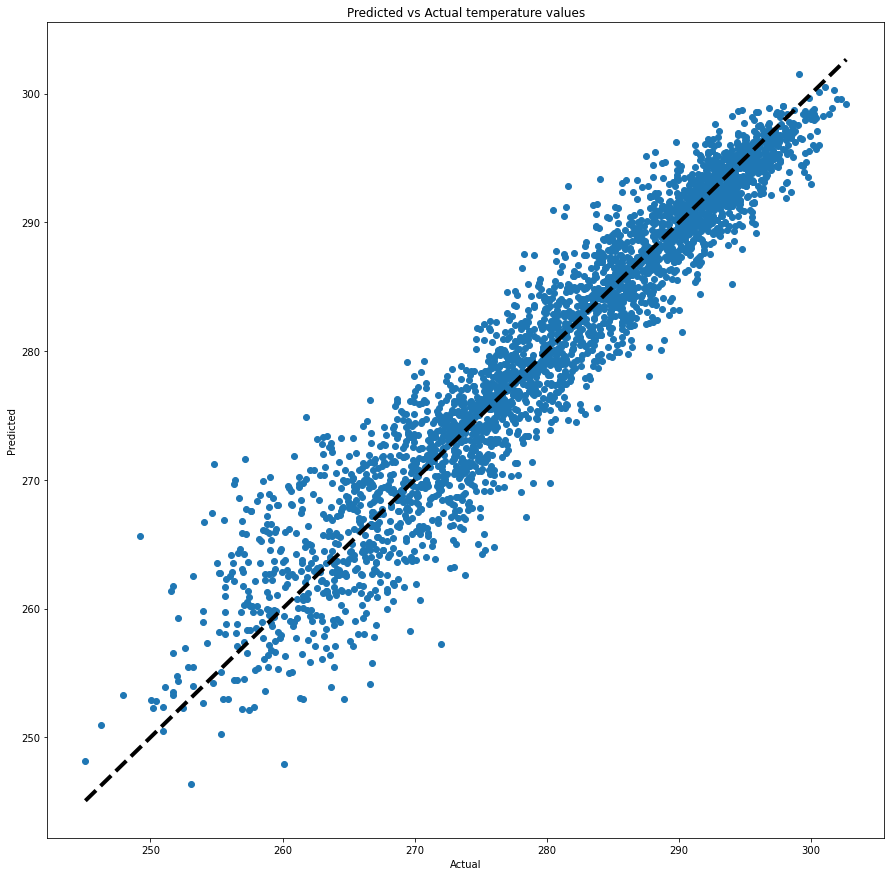

In [43]:
# Plot outputs
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(y_test, pred_lm)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Predicted vs Actual temperature values')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

We note that the model seems to perform better to predict higher temperatures. 

We use cross-validation to understand the variance in our data set.

In [44]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=cv)
scores

array([0.91603145, 0.91679586, 0.91606674, 0.91755359, 0.91554791])

We see that the explained variance is very closed to what we obtained in our model. 

Let's visualise the predictions for a random 100 days period. 

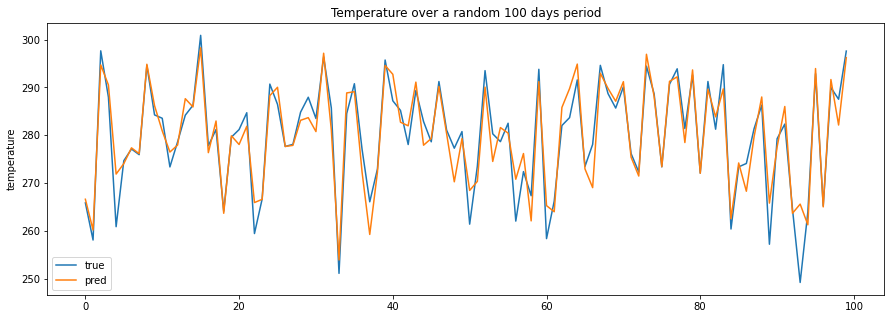

In [49]:
plt_test = []
plt_pred = []

for i in range(100):
    plt_test.append(y_test[1239+i])
    plt_pred.append(pred_lm[1239+i])

plt_test = np.concatenate(plt_test).ravel()
plt_pred = np.concatenate(plt_pred).ravel()

plt.figure(figsize=(15, 5))
plt.plot(plt_test, label='true')
plt.plot(plt_pred, label='pred')
plt.ylabel('temperature')
plt.title('Temperature over a random 100 days period')
plt.legend()
plt.show()

### Polynomial regression model

Since our model may be suffering from bias, we introduce polynommial features. We could use gridSearchCV, but we decide to do a manual search. 

In [66]:
# Split training set into a training and a cross-validation test. 
X_train_poly, X_cv_poly, y_train_poly, y_cv_poly = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Best degree 2 with RMSE 3.3992348323960817


Text(0, 0.5, 'RMSE')

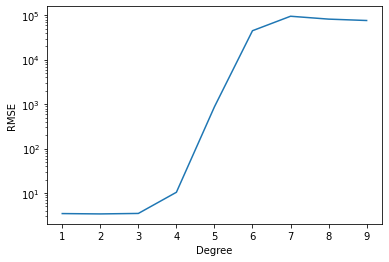

In [69]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train_poly)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train_poly)

    # Compare with test data
    x_poly_test = poly_features.transform(X_cv_poly)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_cv_poly, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

We see that the best polynomial degree is 2, so we appy this model to our data. 

In [77]:
# Train features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

# Linear regression
poly_reg = LinearRegression()
model_poly = poly_reg.fit(X_poly_train, y_train)

In [78]:
X_poly_test = poly_features.transform(X_test)

pred_lm_poly = model_poly.predict(X_poly_test)

MSE = mean_squared_error(y_test, pred_lm_poly)
    
print(MSE)

11.316189780049916


In [79]:
MSE_train = mean_squared_error(y_train, model_poly.predict(X_poly_train))
MSE_test = mean_squared_error(y_test, pred_lm_poly)
MAE_train = mean_absolute_error(y_train, model_poly.predict(X_poly_train))
MAE_test = mean_absolute_error(y_test, pred_lm_poly)

print("Mean squared error on train set: ", MSE_train)
print("Mean squared error on test set: ", MSE_test)
print("Mean absolute error on train set: ", MAE_train)
print("Mean absolute error on test set: ", MAE_test)

Mean squared error on train set:  11.132645747161265
Mean squared error on test set:  11.316189780049916
Mean absolute error on train set:  2.4867024946228247
Mean absolute error on test set:  2.5299358919834494


In [80]:
print("Explained Variance: %.2f" % model_poly.score(X_poly_test, y_test))
print("Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, pred_lm_poly ))
print("Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, pred_lm_poly))

Explained Variance: 0.91
Mean Absolute Error: 2.53 degrees celsius
Median Absolute Error: 1.92 degrees celsius


As we can see, there is not a huge improvment. Finally, let's visualise over the same period. 

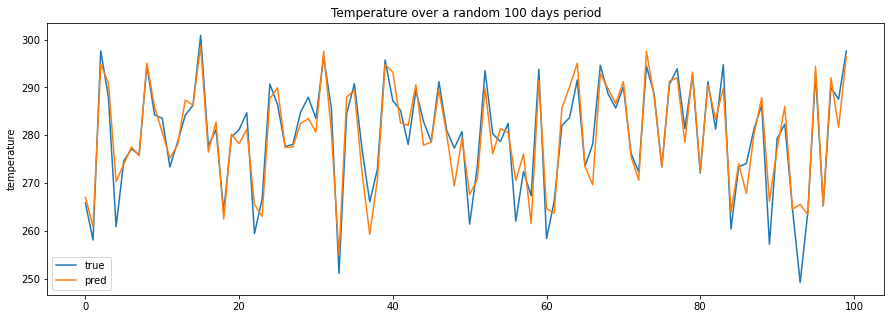

In [81]:
plt_test = []
plt_pred = []

for i in range(100):
    plt_test.append(y_test[1239+i])
    plt_pred.append(pred_lm_poly[1239+i])

plt_test = np.concatenate(plt_test).ravel()
plt_pred = np.concatenate(plt_pred).ravel()

plt.figure(figsize=(15, 5))
plt.plot(plt_test, label='true')
plt.plot(plt_pred, label='pred')
plt.ylabel('temperature')
plt.title('Temperature over a random 100 days period')
plt.legend()
plt.show()

### Regularized linear regression model

We use regularized linear regression model. Surprisingly, the best alpha parameter for Ridge regression is 0. We would have expected a higher alpha, since there is a high correlation between 'temp_1', 'temp_2' and 'temp_3'. However, as noted earlier, overfitting does not seem to be an issue. We will perform further analysis later. 

#### Ridge Regression

We use Ridge linear regression and analyze the performance of the model.  

We need to scale the features for the model to be performing right. 

In [50]:
from sklearn.preprocessing import StandardScaler

In [57]:
# Initialise the Scaler 
scaler = StandardScaler()

In [58]:
X_train_ridge = scaler.fit_transform(X_train)
X_test_ridge = scaler.transform(X_test)

We use cross-validation to find the optimal alpha value. 

In [59]:
cv_ridge = KFold(n_splits = 5, random_state=42, shuffle = True)
alphas = [x*0.001 for x in range(0, 100)]
lm_ridge = RidgeCV(alphas = alphas, cv = cv_ridge)
model_ridge = lm_ridge.fit(X_train_ridge, y_train)

Surprisingly, alpha = 0 is the best parameter. 

In [60]:
# Alpha in ridge regression
model_ridge.alpha_

0.0

In [61]:
pred_ridge = model_ridge.predict(X_test_ridge)
MSE = mean_squared_error(y_test, pred_ridge)
print(MSE)

11.628326507468044


In [62]:
print("Explained Variance: %.2f" % lm_ridge.score(X_test_ridge, y_test))
print("Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, pred_ridge))
print("Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, pred_ridge))

Explained Variance: 0.91
Mean Absolute Error: 2.55 degrees celsius
Median Absolute Error: 1.93 degrees celsius


We see that regularization did not improve the performance of our model.

We plot the predicted values compared to the actual values. 

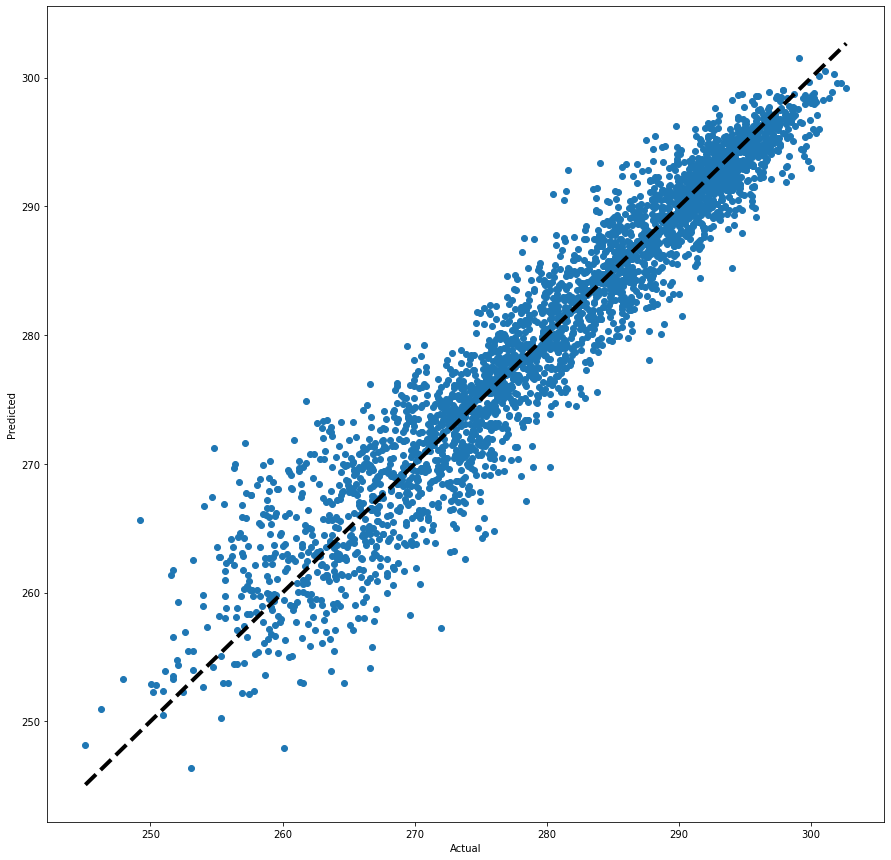

In [63]:
# Plot outputs
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(y_test, pred_ridge)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

#### Lasso Regression

We use Lasso linear regression and analyze the performance of the model.  

We need to scale the features for the model to be performing right. 

In [ ]:
from sklearn.linear_model import LassoCV

cv_lasso = KFold(n_splits = 5, random_state=42, shuffle = True)
lm_lasso = LassoCV(cv = cv_lasso)
model_lasso = lm_lasso.fit(X_train_ridge, y_train.values.ravel())

In [ ]:
# Best alpha parameter
model_lasso.alpha_

In [ ]:
pred_lasso = model_lasso.predict(X_test_ridge)
MSE = mean_squared_error(y_test, pred_lasso)
print(MSE)

In [ ]:
print("Explained Variance: %.2f" % lm_lasso.score(X_test_ridge, y_test))
print("Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, pred_lasso))
print("Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, pred_lasso))

We see that this does not provide an improvment either. 